In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

In [7]:
data = pd.DataFrame({
    'age': [25, 30, 45, 35, 40, 50, 23, 37],
    'income': [4000, 6000, 10000, 8000, 12000, 14000, 3500, 9000],
    'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'purchased': [0, 1, 1, 0, 1, 1, 0, 1]  # Target
})

In [8]:
data.head()

,age,income,gender,purchased
0,25,4000,male,0
1,30,6000,female,1
2,45,10000,male,1
3,35,8000,female,0
4,40,12000,male,1


In [9]:
data.shape

(8, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8 non-null      int64 
 1   income     8 non-null      int64 
 2   gender     8 non-null      object
 3   purchased  8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 388.0+ bytes


In [11]:
data.describe()

,age,income,purchased
count,8.000000,8.000000,8.000000
mean,35.625000,8312.500000,0.625000
std,9.410291,3712.310601,0.517549
min,23.000000,3500.000000,0.000000
25%,28.750000,5500.000000,0.000000
50%,36.000000,8500.000000,1.000000
75%,41.250000,10500.000000,1.000000
max,50.000000,14000.000000,1.000000


# ENCODING

In [12]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # male=1, female=0

In [13]:
data

,age,income,gender,purchased
0,25,4000,1,0
1,30,6000,0,1
2,45,10000,1,1
3,35,8000,0,0
4,40,12000,1,1
5,50,14000,0,1
6,23,3500,1,0
7,37,9000,0,1


# SPLIT

In [14]:
X = data[['age', 'income', 'gender']]
y = data['purchased']

In [15]:
X

,age,income,gender
0,25,4000,1
1,30,6000,0
2,45,10000,1
3,35,8000,0
4,40,12000,1
5,50,14000,0
6,23,3500,1
7,37,9000,0


In [16]:
y

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    1
Name: purchased, dtype: int64

# SCALING

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled.shape

(8, 3)

# SAVE SCALER AND ENCODER

In [19]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

# SPLIT BEFORE TRAIN AND TEST

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)


In [21]:
X_train.shape

(4, 3)

In [22]:
X_test.shape

(4, 3)

In [23]:
y_train.value_counts()

purchased
1    2
0    2
Name: count, dtype: int64

In [24]:
y_test.value_counts()

purchased
1    3
0    1
Name: count, dtype: int64

# BUILD AND TRAIN MODEL

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# MAKE PREDICTION

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([0, 1, 0, 0])

# EVELUATION

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4

Confusion Matrix:
[[1 0]
 [2 1]]


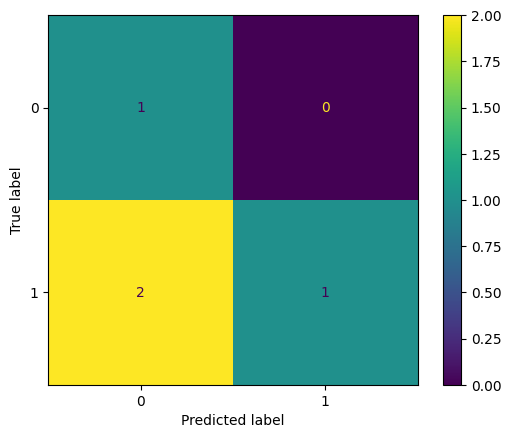

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 6. Evaluasi prestasi model
from sklearn.metrics import accuracy_score, classification_report

# Kira ketepatan
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Paparkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="viridis")  # Anda boleh tukar 'viridis' kepada skema warna lain


# SAVE MODEL

In [29]:

joblib.dump(model, 'model.pkl')

['model.pkl']